In [1]:
import sys
print(sys.executable)

c:\Users\jonatas.lopes\ACKIT\prototipo_tcc_nlp_streamlit\venv\Scripts\python.exe


In [43]:
%pip install pandas matplotlib seaborn

You should consider upgrading via the 'c:\Users\jonatas.lopes\ACKIT\prototipo_tcc_nlp_streamlit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('pdf1_respostas.csv', sep='|', encoding='utf-8')
df2 = pd.read_csv('pdf2_respostas.csv', sep='|', encoding='utf-8')
df = pd.concat([df1, df2], ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome_Perfil       68 non-null     object 
 1   LLM               68 non-null     object 
 2   Embedding_Model   68 non-null     object 
 3   Dim_Value         68 non-null     int64  
 4   Chunk_Size        68 non-null     int64  
 5   Overlap           68 non-null     int64  
 6   Top_K             68 non-null     int64  
 7   Timestamp         68 non-null     object 
 8   Prompt_technique  68 non-null     object 
 9   Pergunta          68 non-null     object 
 10  Resposta          68 non-null     object 
 11  Contexto_Usado    68 non-null     object 
 12  Tempo_Segundos    68 non-null     float64
 13  Acuracia          68 non-null     float64
 14  pergunta_id       68 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 8.1+ KB
None


In [15]:
df_pivot = df.pivot(index='pergunta_id', columns='Nome_Perfil', values='Acuracia')
df_pivot = df_pivot.sort_index()
perfis_disponiveis = sorted(df1['Nome_Perfil'].unique())
cores_hex = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
mapa_cores = dict(zip(perfis_disponiveis, cores_hex))

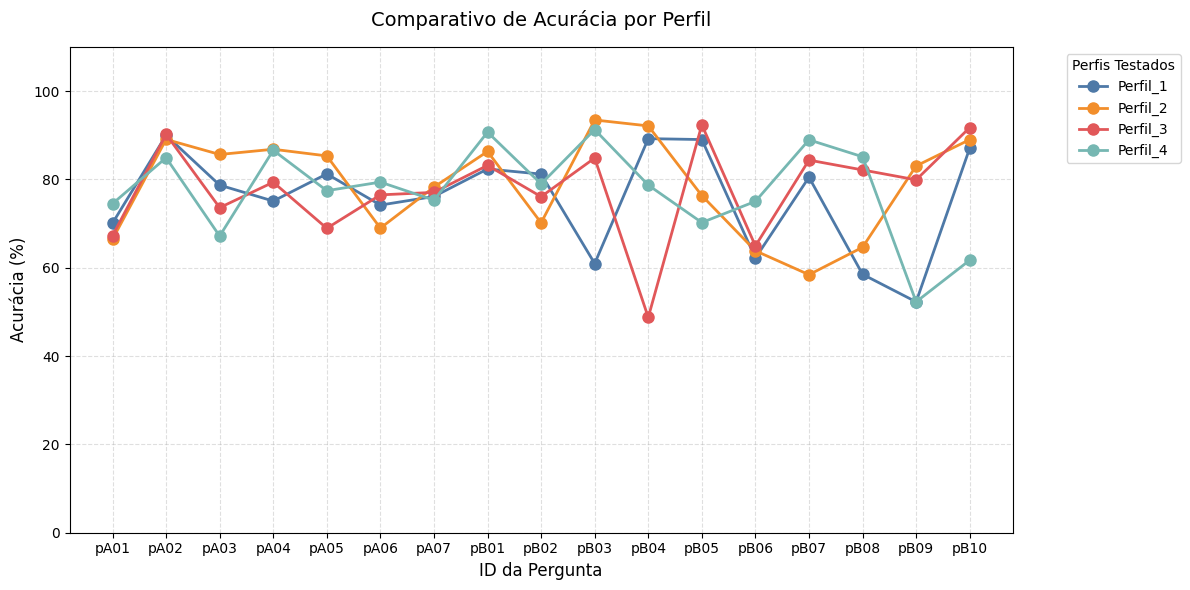

In [17]:
# 1. Garantimos que o pivot está pronto
df_pivot = df.pivot(index='pergunta_id', columns='Nome_Perfil', values='Acuracia')

# 2. Configuração da Figura
plt.figure(figsize=(12, 6))

# 3. O Loop Inteligente: Iteramos sobre as colunas e buscamos a cor no dicionário
for perfil in df_pivot.columns:
    # Decisão: Buscamos a cor exata que "amarramos" a esse perfil lá no início
    cor_do_perfil = mapa_cores[perfil]
    
    plt.plot(
        df_pivot.index, 
        df_pivot[perfil], 
        marker='o', 
        label=perfil, 
        color=cor_do_perfil, # Aqui está a amarração!
        linewidth=2,         # Decisão: Linha um pouco mais grossa para destacar
        markersize=8         # Decisão: Pontos maiores para facilitar o clique/leitura
    )

# Configurações de Eixos e Estilo
plt.ylim(0, 110)
plt.xlabel('ID da Pergunta', fontsize=12)
plt.ylabel('Acurácia (%)', fontsize=12)
plt.title('Comparativo de Acurácia por Perfil', fontsize=14, pad=15)

# Legenda externa para não poluir os dados
plt.legend(title='Perfis Testados', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


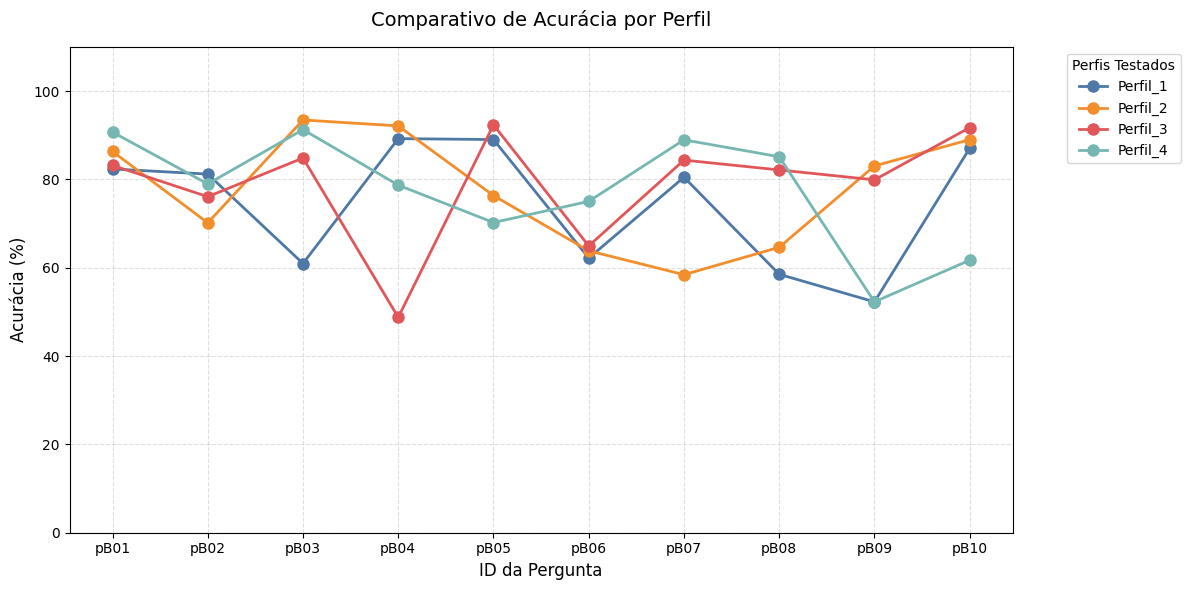

In [6]:
# 1. Garantimos que o pivot está pronto
df2_pivot = df2.pivot(index='pergunta_id', columns='Nome_Perfil', values='Acuracia')

# 2. Configuração da Figura
plt.figure(figsize=(12, 6))

# 3. O Loop Inteligente: Iteramos sobre as colunas e buscamos a cor no dicionário
for perfil in df2_pivot.columns:
    # Decisão: Buscamos a cor exata que "amarramos" a esse perfil lá no início
    cor_do_perfil = mapa_cores[perfil]
    
    plt.plot(
        df2_pivot.index, 
        df2_pivot[perfil], 
        marker='o', 
        label=perfil, 
        color=cor_do_perfil, # Aqui está a amarração!
        linewidth=2,         # Decisão: Linha um pouco mais grossa para destacar
        markersize=8         # Decisão: Pontos maiores para facilitar o clique/leitura
    )

# Configurações de Eixos e Estilo
plt.ylim(0, 110)
plt.xlabel('ID da Pergunta', fontsize=12)
plt.ylabel('Acurácia (%)', fontsize=12)
plt.title('Comparativo de Acurácia por Perfil', fontsize=14, pad=15)

# Legenda externa para não poluir os dados
plt.legend(title='Perfis Testados', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

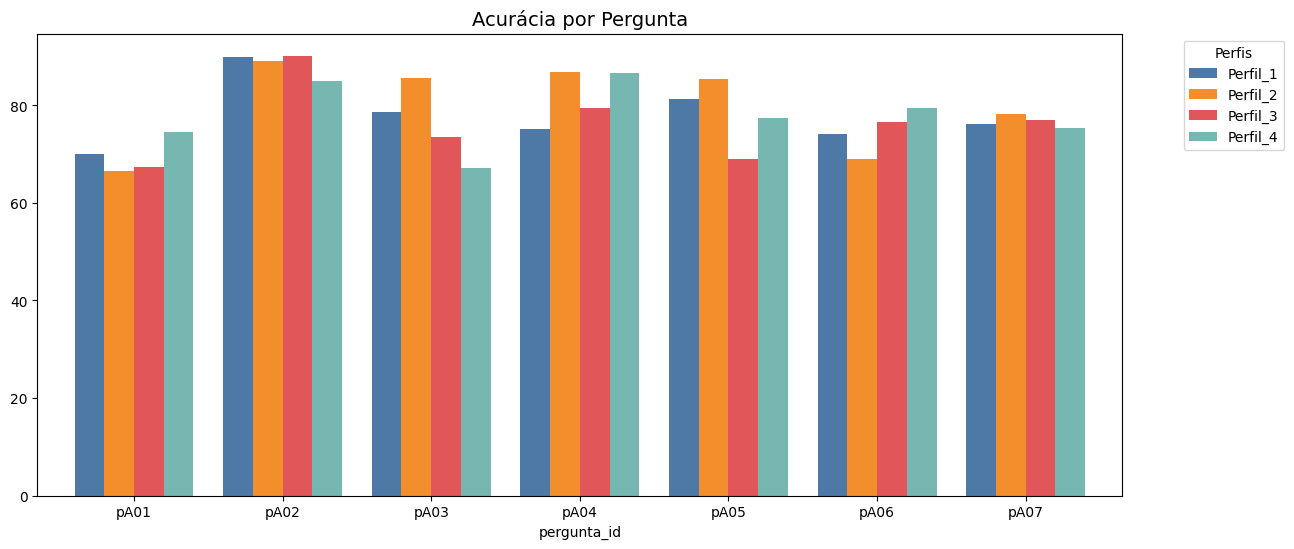

In [64]:
# 1. Pivotar
df1_pivot = df1.pivot(index='pergunta_id', columns='Nome_Perfil', values='Acuracia')

# 2. Garantir que a lista de cores siga a ordem das colunas do pivot
lista_cores_ordenada = [mapa_cores[col] for col in df1_pivot.columns]

# 3. Plotar
ax = df1_pivot.plot(kind='bar', figsize=(14, 6), color=lista_cores_ordenada, width=0.8)

plt.title('Acurácia por Pergunta', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Perfis', bbox_to_anchor=(1.05, 1))
plt.show()

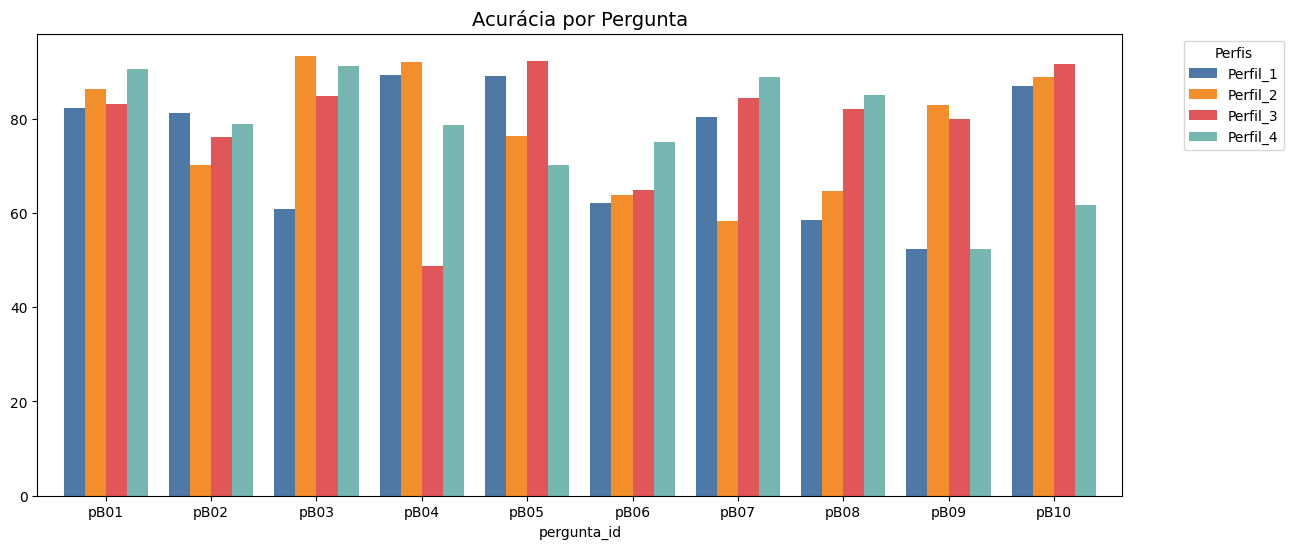

In [55]:
# 1. Pivotar
df2_pivot = df2.pivot(index='pergunta_id', columns='Nome_Perfil', values='Acuracia')

# 2. Garantir que a lista de cores siga a ordem das colunas do pivot
lista_cores_ordenada = [mapa_cores[col] for col in df2_pivot.columns]

# 3. Plotar
ax = df2_pivot.plot(kind='bar', figsize=(14, 6), color=lista_cores_ordenada, width=0.8)

plt.title('Acurácia por Pergunta', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Perfis', bbox_to_anchor=(1.05, 1))
plt.show()

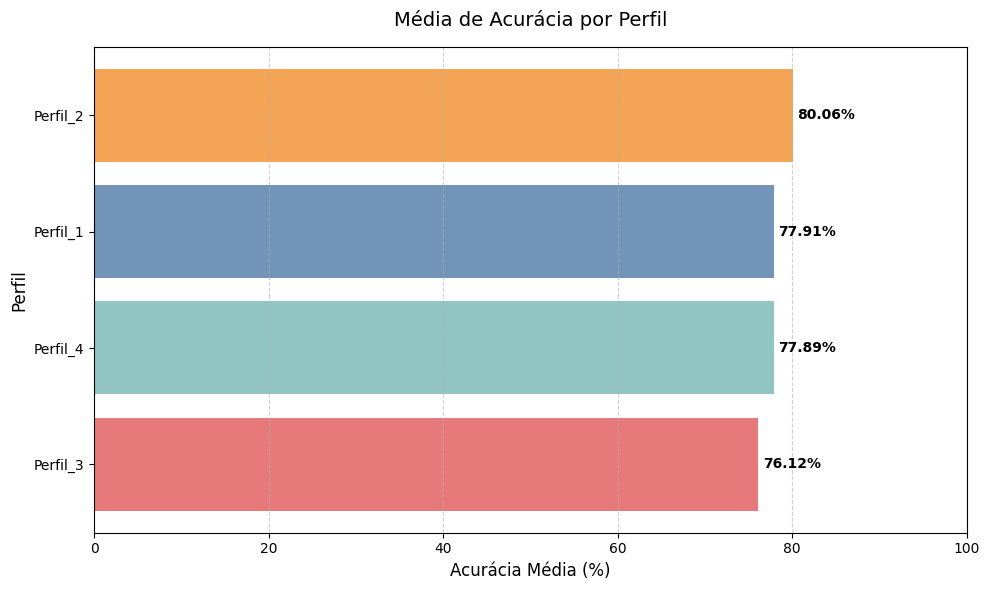

In [56]:
# 1. Calculamos a média e ordenamos
df1_media = df1.groupby('Nome_Perfil')['Acuracia'].mean().sort_values()

# 2. O Pulo do Gato: Criamos uma lista de cores seguindo a ordem do index do df_media
# df_media.index contém os nomes dos perfis na ordem em que aparecerão no gráfico
cores_ordenadas = [mapa_cores[perfil] for perfil in df1_media.index]
# 3. Plotagem
plt.figure(figsize=(10, 6))

# Passamos a lista de cores mapeadas
# Decisão: Usei barh (horizontal) porque facilita a leitura dos nomes dos perfis
bars = plt.barh(df1_media.index, df1_media.values, color=cores_ordenadas, alpha=0.8)

# Detalhe de Sênior: Adicionar o valor numérico na ponta da barra ajuda na leitura rápida
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', va='center', fontsize=10, fontweight='bold')

# Estilização
plt.title('Média de Acurácia por Perfil', fontsize=14, pad=15)
plt.xlabel('Acurácia Média (%)', fontsize=12)
plt.ylabel('Perfil', fontsize=12)
plt.xlim(0, 100) # Mantemos 0 a 100 aqui para mostrar o quão longe estamos da perfeição
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

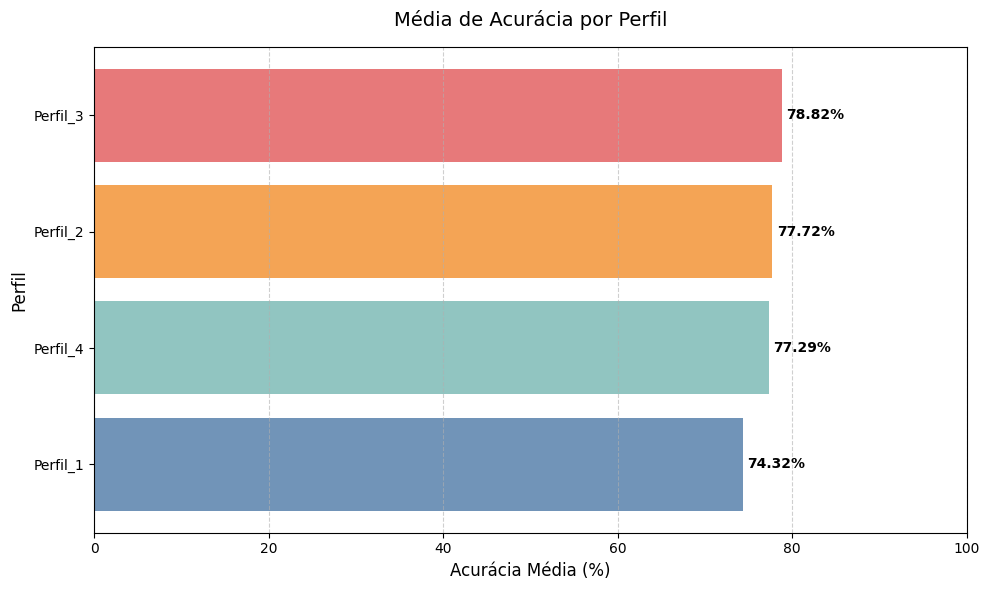

In [57]:
# 1. Calculamos a média e ordenamos
df2_media = df2.groupby('Nome_Perfil')['Acuracia'].mean().sort_values()

# 2. O Pulo do Gato: Criamos uma lista de cores seguindo a ordem do index do df_media
# df_media.index contém os nomes dos perfis na ordem em que aparecerão no gráfico
cores_ordenadas = [mapa_cores[perfil] for perfil in df2_media.index]
# 3. Plotagem
plt.figure(figsize=(10, 6))

# Passamos a lista de cores mapeadas
# Decisão: Usei barh (horizontal) porque facilita a leitura dos nomes dos perfis
bars = plt.barh(df2_media.index, df2_media.values, color=cores_ordenadas, alpha=0.8)

# Detalhe de Sênior: Adicionar o valor numérico na ponta da barra ajuda na leitura rápida
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', va='center', fontsize=10, fontweight='bold')

# Estilização
plt.title('Média de Acurácia por Perfil', fontsize=14, pad=15)
plt.xlabel('Acurácia Média (%)', fontsize=12)
plt.ylabel('Perfil', fontsize=12)
plt.xlim(0, 100) # Mantemos 0 a 100 aqui para mostrar o quão longe estamos da perfeição
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

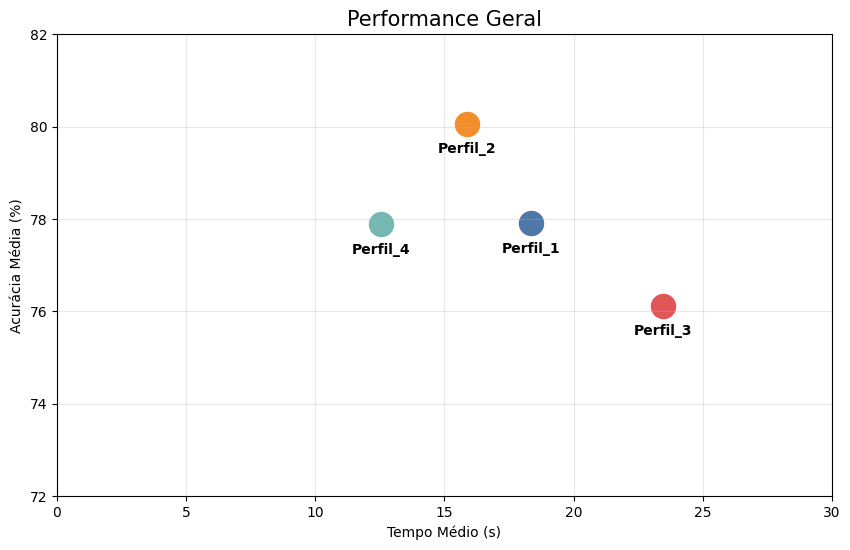

In [58]:
df1_eficiencia = df1.groupby('Nome_Perfil').agg({'Acuracia': 'mean', 'Tempo_Segundos': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

for i, row in df1_eficiencia.iterrows():
    nome = row['Nome_Perfil']
    cor_perfil = mapa_cores[nome] # Decisão: busca a cor amarrada ao nome
    
    plt.scatter(row['Tempo_Segundos'], row['Acuracia'], s=300, c=cor_perfil)
    
    plt.text(row['Tempo_Segundos'], row['Acuracia'] - 0.4, nome, 
             ha='center', va='top', fontweight='bold', fontsize=10)

plt.ylim(72, 82) # O zoom que você pediu
plt.xlim(0, 30)
plt.title('Performance Geral', fontsize=15)
plt.xlabel('Tempo Médio (s)')
plt.ylabel('Acurácia Média (%)')
plt.grid(True, alpha=0.3)
plt.show()

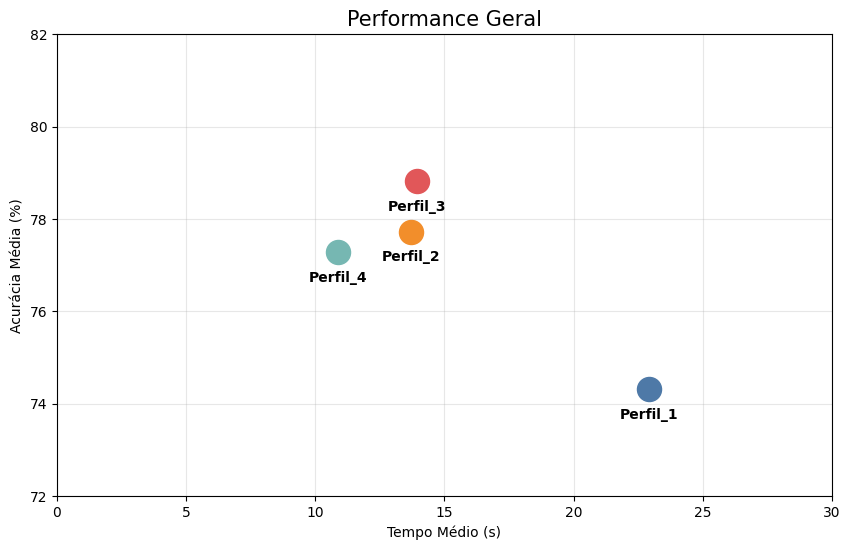

In [59]:
df2_eficiencia = df2.groupby('Nome_Perfil').agg({'Acuracia': 'mean', 'Tempo_Segundos': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

for i, row in df2_eficiencia.iterrows():
    nome = row['Nome_Perfil']
    cor_perfil = mapa_cores[nome] # Decisão: busca a cor amarrada ao nome
    
    plt.scatter(row['Tempo_Segundos'], row['Acuracia'], s=300, c=cor_perfil)
    
    plt.text(row['Tempo_Segundos'], row['Acuracia'] - 0.4, nome, 
             ha='center', va='top', fontweight='bold', fontsize=10)

plt.ylim(72, 82) # O zoom que você pediu
plt.xlim(0, 30)
plt.title('Performance Geral', fontsize=15)
plt.xlabel('Tempo Médio (s)')
plt.ylabel('Acurácia Média (%)')
plt.grid(True, alpha=0.3)
plt.show()

--------------- mais profundo, consistencia


C:\Users\jonatas.lopes\AppData\Local\Temp\ipykernel_31132\2909556153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nome_Perfil', y='Acuracia', data=df1, palette=mapa_cores)


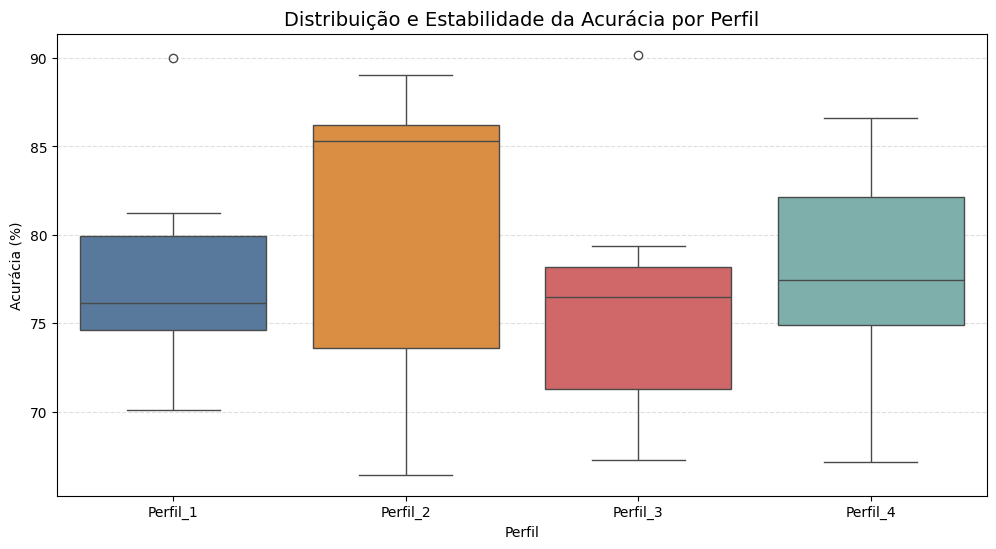

In [46]:
plt.figure(figsize=(12, 6))

# Decisão: O Boxplot mostra a variação da acurácia. 
# Se a "caixa" for pequena, o modelo é estável. Se for grande, ele é instável.
sns.boxplot(x='Nome_Perfil', y='Acuracia', data=df1, palette=mapa_cores)

plt.title('Distribuição e Estabilidade da Acurácia por Perfil', fontsize=14)
plt.ylabel('Acurácia (%)')
plt.xlabel('Perfil')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

C:\Users\jonatas.lopes\AppData\Local\Temp\ipykernel_31132\395072228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nome_Perfil', y='Acuracia', data=df2, palette=mapa_cores)


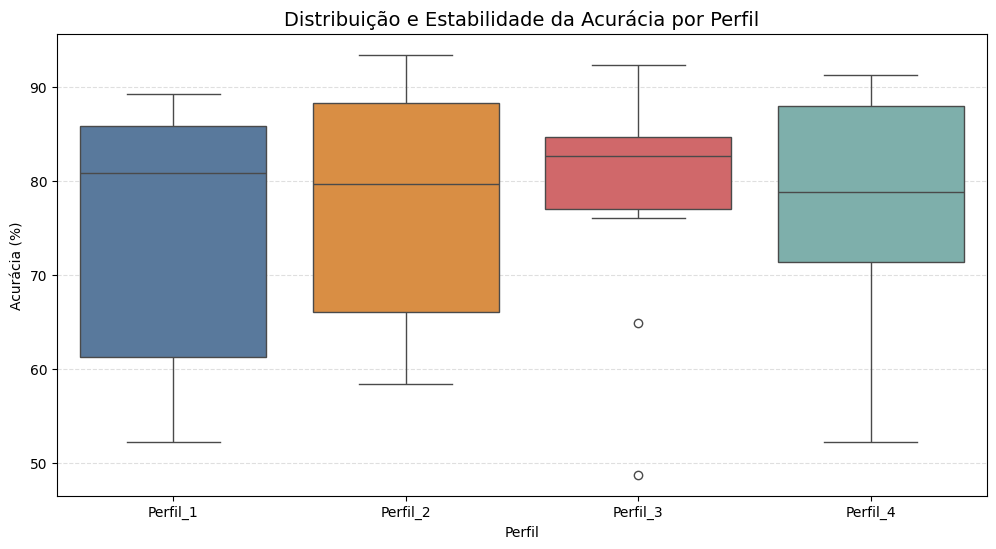

In [60]:
plt.figure(figsize=(12, 6))

# Decisão: O Boxplot mostra a variação da acurácia. 
# Se a "caixa" for pequena, o modelo é estável. Se for grande, ele é instável.
sns.boxplot(x='Nome_Perfil', y='Acuracia', data=df2, palette=mapa_cores)

plt.title('Distribuição e Estabilidade da Acurácia por Perfil', fontsize=14)
plt.ylabel('Acurácia (%)')
plt.xlabel('Perfil')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

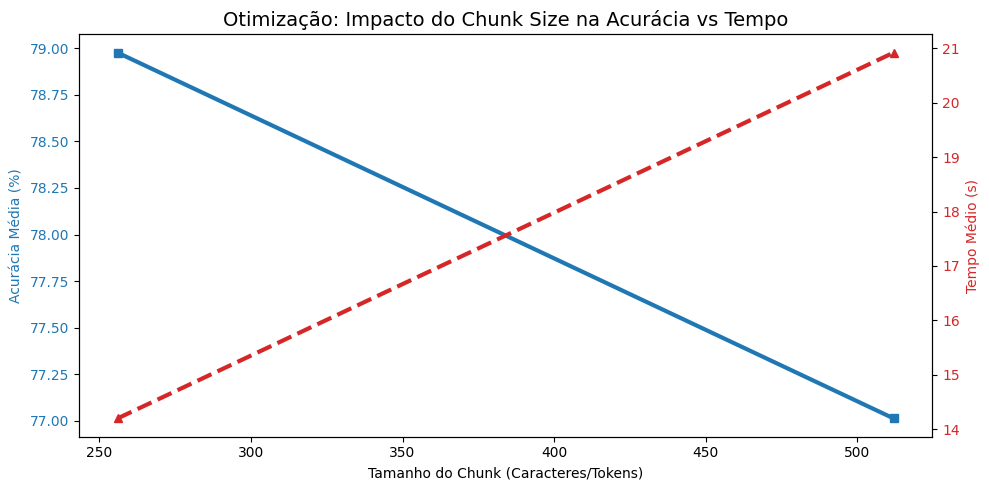

In [47]:
# Agrupando por Chunk_Size para ver a tendência
df_param = df1.groupby('Chunk_Size').agg({'Acuracia': 'mean', 'Tempo_Segundos': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Eixo 1: Acurácia
color1 = 'tab:blue'
ax1.set_xlabel('Tamanho do Chunk (Caracteres/Tokens)')
ax1.set_ylabel('Acurácia Média (%)', color=color1)
ax1.plot(df_param['Chunk_Size'], df_param['Acuracia'], marker='s', color=color1, linewidth=3, label='Acurácia')
ax1.tick_params(axis='y', labelcolor=color1)

# Eixo 2: Tempo (criando um eixo gêmeo que compartilha o mesmo X)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Tempo Médio (s)', color=color2)
ax2.plot(df_param['Chunk_Size'], df_param['Tempo_Segundos'], marker='^', color=color2, linewidth=3, linestyle='--', label='Tempo')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Otimização: Impacto do Chunk Size na Acurácia vs Tempo', fontsize=14)
fig.tight_layout()
plt.show()

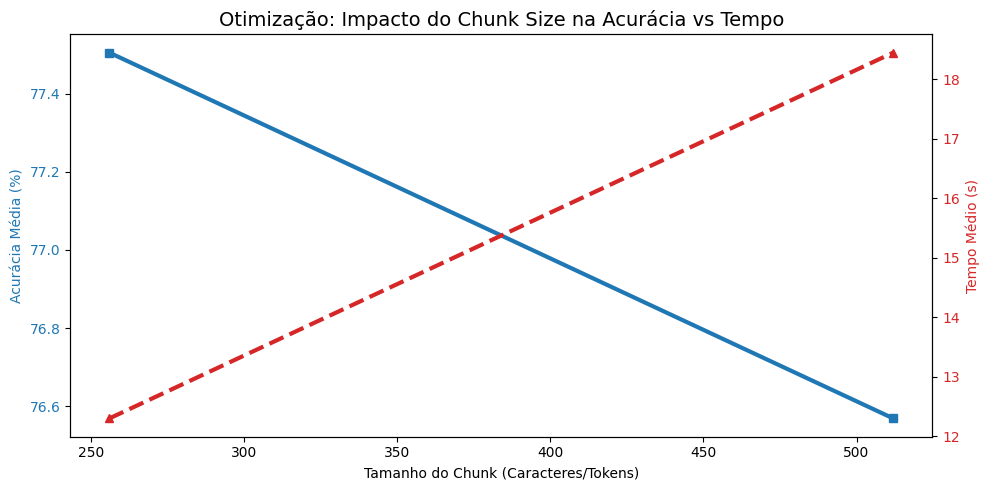

In [61]:
# Agrupando por Chunk_Size para ver a tendência
df2_param = df2.groupby('Chunk_Size').agg({'Acuracia': 'mean', 'Tempo_Segundos': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Eixo 1: Acurácia
color1 = 'tab:blue'
ax1.set_xlabel('Tamanho do Chunk (Caracteres/Tokens)')
ax1.set_ylabel('Acurácia Média (%)', color=color1)
ax1.plot(df2_param['Chunk_Size'], df2_param['Acuracia'], marker='s', color=color1, linewidth=3, label='Acurácia')
ax1.tick_params(axis='y', labelcolor=color1)

# Eixo 2: Tempo (criando um eixo gêmeo que compartilha o mesmo X)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Tempo Médio (s)', color=color2)
ax2.plot(df2_param['Chunk_Size'], df2_param['Tempo_Segundos'], marker='^', color=color2, linewidth=3, linestyle='--', label='Tempo')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Otimização: Impacto do Chunk Size na Acurácia vs Tempo', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
def calcular_significancia(perfil_a, perfil_b):
    acc_a = df[df['Nome_Perfil'] == perfil_a]['Acuracia']
    acc_b = df[df['Nome_Perfil'] == perfil_b]['Acuracia']
    
    t_stat, p_val = stats.ttest_ind(acc_a, acc_b)
    
    print(f"Comparando {perfil_a} vs {perfil_b}:")
    print(f"P-valor: {p_val:.4f}")
    if p_val < 0.05:
        print("✅ Resultado Estatisticamente Significante (p < 0.05)")
    else:
        print("❌ Não há evidências estatísticas de diferença.")

# Exemplo de uso:
calcular_significancia('Perfil_1', 'Perfil_4')

Comparando Perfil_1 vs Perfil_4:
P-valor: 0.6480
❌ Não há evidências estatísticas de diferença.


   Prompt_technique   Acuracia  Tempo_Segundos
0  chain-of-thought  77.621457       14.719412
1         zero-shot  77.241218       17.828824


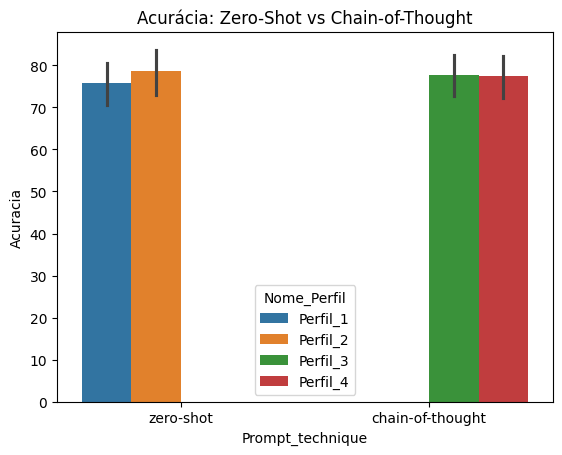

In [8]:
prompt_analysis = df.groupby('Prompt_technique').agg({
    'Acuracia': 'mean',
    'Tempo_Segundos': 'mean'
}).reset_index()

print(prompt_analysis)

# Visualização rápida
sns.barplot(data=df, x='Prompt_technique', y='Acuracia', hue='Nome_Perfil')
plt.title("Acurácia: Zero-Shot vs Chain-of-Thought")
plt.show()

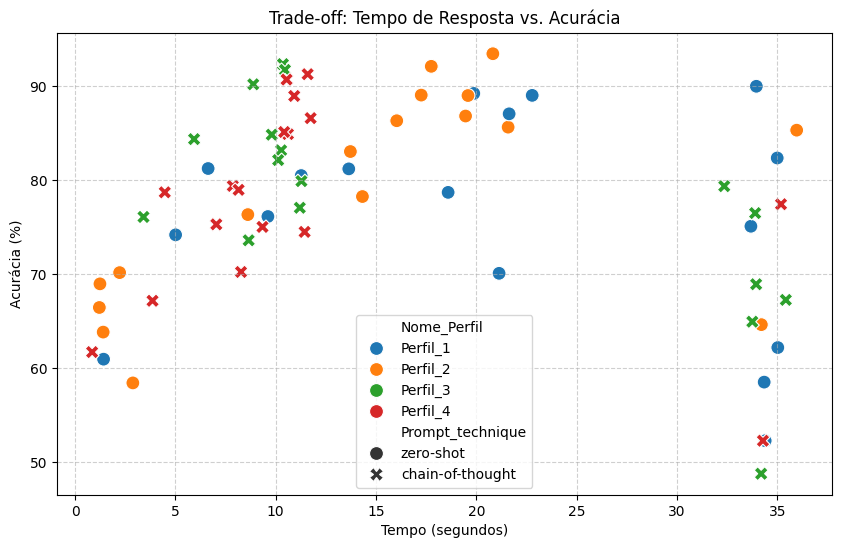

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Tempo_Segundos', y='Acuracia', hue='Nome_Perfil', style='Prompt_technique', s=100)

plt.title("Trade-off: Tempo de Resposta vs. Acurácia")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Acurácia (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
# Filtrando perguntas onde a acurácia foi menor que 40%
piores_resultados = df[df['Acuracia'] < 40][['Pergunta', 'Resposta', 'Contexto_Usado', 'Nome_Perfil']]

# Exportar para CSV para analisar no Excel/Word do TCC
piores_resultados.to_csv('analise_de_erros.csv', index=False)

print(f"Foram encontrados {len(piores_resultados)} casos críticos para análise qualitativa.")

Foram encontrados 0 casos críticos para análise qualitativa.


In [11]:
df['Hit'] = df['Acuracia'].apply(lambda x: 1 if x > 70 else 0)
hit_rate = df.groupby('Nome_Perfil')['Hit'].mean() * 100

print("Hit Rate por Perfil (% de respostas satisfatórias):")
print(hit_rate)

Hit Rate por Perfil (% de respostas satisfatórias):
Nome_Perfil
Perfil_1    76.470588
Perfil_2    70.588235
Perfil_3    76.470588
Perfil_4    82.352941
Name: Hit, dtype: float64


In [ ]:
# plt.figure(figsize=(12, 6))

# for coluna in df_pivot.columns:
#     plt.plot(df_pivot.index, df_pivot[coluna], marker='o', label=coluna)

# # Configurações de Eixos
# plt.ylim(0, 110) # Garante que o Y vá de 0 a 100 (com uma folga no topo)
# plt.xlabel('ID da Pergunta', fontsize=12)
# plt.ylabel('Acurácia (%)', fontsize=12)
# plt.title('Comparativo de Acurácia por Perfil de Configuração', fontsize=14)

# # Decisão: Colocamos a legenda fora do gráfico ou em um local que não atrapalhe
# plt.legend(title='Perfis Testados', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.grid(True, linestyle='--', alpha=0.6) # Grid ajuda a ler valores médios
# plt.tight_layout()

# plt.show()
# ax = df_pivot.plot(kind='bar', figsize=(14, 7), width=0.8, color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])
# plt.xticks(rotation=0)
# plt.ylim(0, 110)
# plt.title('Comparativo de Acurácia por Pergunta e Perfil', fontsize=15, pad=20)
# plt.xlabel('ID da Pergunta', fontsize=12)
# plt.ylabel('Acurácia (%)', fontsize=12)
# plt.legend(title='Perfis', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()
# df_media = df1.groupby('Nome_Perfil')['Acuracia'].mean().sort_values()
# plt.figure(figsize=(10, 5))
# df_media.plot(kind='barh', color='skyblue')

# plt.title('Média de Acurácia por Perfil (Geral)', fontsize=14)
# plt.xlabel('Acurácia Média (%)')
# plt.ylabel('Perfil')
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.show()
# df_eficiencia = df1.groupby('Nome_Perfil').agg({
#     'Acuracia': 'mean',
#     'Tempo_Segundos': 'mean'
# }).reset_index()

# plt.figure(figsize=(10, 6))
# for i, row in df_eficiencia.iterrows():
#     plt.scatter(row['Tempo_Segundos'], row['Acuracia'], s=300) # s é o tamanho da bola
#     plt.text(row['Tempo_Segundos'] + 0.1, row['Acuracia'] + 0.5, row['Nome_Perfil']) # Etiqueta o nome

# plt.title('Análise de Eficiência: Acurácia vs. Tempo de Resposta', fontsize=14)
# plt.xlabel('Tempo Médio (Segundos)')
# plt.ylabel('Acurácia Média (%)')
# plt.grid(True, alpha=0.3)

# # Adicionamos uma linha de referência para o que seria o "tempo ideal" (ex: 5 segundos)
# plt.axvline(x=5, color='red', linestyle='--', label='Meta de Latência (5s)')
# plt.legend()

# plt.show()
# # 1. Agrupamento dos dados
# df_eficiencia = df1.groupby('Nome_Perfil').agg({
#     'Acuracia': 'mean',
#     'Tempo_Segundos': 'mean'
# }).reset_index()

# # 2. Decisão de Sênior: Criar um mapeamento explícito de cores
# # Isso garante consistência visual em todos os seus gráficos
# cores_lista = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
# perfis_unicos = sorted(df_eficiencia['Nome_Perfil'].unique())
# mapa_cores = dict(zip(perfis_unicos, cores_lista))

# # 3. Configuração do Gráfico
# plt.figure(figsize=(12, 7))

# # Plotamos cada ponto individualmente para aplicar a cor correta do dicionário
# for i, row in df_eficiencia.iterrows():
#     nome = row['Nome_Perfil']
#     cor = mapa_cores[nome]
    
#     # Desenha o ponto
#     plt.scatter(row['Tempo_Segundos'], row['Acuracia'], 
#                 s=250, c=cor, edgecolors='black', alpha=0.9, label=nome)
    
#     # Desenha o texto centralizado abaixo
#     plt.text(
#         x = row['Tempo_Segundos'], 
#         y = row['Acuracia'] - 0.4, # Ajuste fino do respiro para o zoom de 70-85
#         s = nome, 
#         fontsize = 10,
#         fontweight = 'bold',
#         ha = 'center', 
#         va = 'top',
#         color = '#333333' # Cinza escuro para o texto não brigar com a cor do ponto
#     )

# # --- Configurações de Eixo e Estilo ---

# # O Zoom solicitado
# plt.ylim(70, 85)

# # Respiro lateral automático baseado nos dados
# margem_x = (df_eficiencia['Tempo_Segundos'].max() - df_eficiencia['Tempo_Segundos'].min()) * 0.2
# plt.xlim(df_eficiencia['Tempo_Segundos'].min() - margem_x, 
#          df_eficiencia['Tempo_Segundos'].max() + margem_x)

# plt.title('Análise de Performance: Acurácia vs. Tempo (Zoom 70-85%)', fontsize=15, pad=25)
# plt.xlabel('Tempo Médio de Resposta (Segundos)', fontsize=12)
# plt.ylabel('Acurácia Média (%)', fontsize=12)

# # Grid mais suave para não poluir
# plt.grid(True, linestyle=':', alpha=0.4)

# # Opcional: Remover a legenda já que o nome está abaixo do ponto
# # plt.legend() 

# plt.tight_layout()
# plt.show()